In [3]:
import shap
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [4]:
# Bibliotecas dos Modelos Utilizados
from sklearn.linear_model import LogisticRegression  # Regressão Logística.
from sklearn.svm import SVC                          # Máquinas de Vetores de Suporte (SVM).
from sklearn.neighbors import KNeighborsClassifier   # K-Vizinhos Mais Próximos
from sklearn.tree import DecisionTreeClassifier      # Árvore de Decisões de Classificação.
from sklearn.ensemble import RandomForestClassifier  # Floresta Aleatória.
from xgboost import XGBClassifier                    # Extreme Gradient Boosting.

In [5]:
# Análise de Dados
from sklearn.decomposition import PCA

# Treinamento
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Avalição
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.inspection import plot_partial_dependence
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Tuning
from sklearn.model_selection import GridSearchCV

# Análise de Dados

In [6]:
# Carregar o DataFrame a partir de um arquivo Excel
caminho_arquivo_excel = 'C:\\Users\\Andre\\Desktop\\Julia\\Mangue_Baja\\DESAFIO TÉCNICO\\anonymizedData.xlsx'
nome_da_pagina = 'P_Aceleration'  # Nome da página desejada

# Lê o arquivo Excel com todas as páginas/sheets
xl = pd.ExcelFile(caminho_arquivo_excel)

df = xl.parse(nome_da_pagina)

# Vê dados 
df.head()

Workbook contains no default style, apply openpyxl's default


,DP_Entre-Eixo,DP_Bitola Dianteira,DP_Bitola Traseira,DP_Altura,DP_Comprimento,DP_Altura do CG com relacao ao chao,MV_Eixo dianteiro,MV_Eixo Traseiro,DMV_Dianteira,DMV_Lado Direito,...,CD_Distancia de frenagem de 35 a 0 em asfalto,CD_Distancia de frenagem de 35 a 0 em terra batida,CD_Ganho de rolagem por aceleracao lateral,CD_Ganho de arfagem em aceleracao longitudinal,CD_Ganho de arfagem em desaceleracao longitudinal,CD_Velocidade maxima de 0 a 100 metros em asfalto,CD_Velocidade maxima de 0 a 100 metros em terra batida,CD_Tempo para atingir velocidade maxima em asfalto,CD_Tempo para atingir velocidade maxima em terra batida,P_Aceleracao
0,1409.565056,1291.374765,1127.937101,1663.806440,2056.763003,NaN,77.103974,95.577887,0.454945,0.500616,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1507.926208,1309.115732,1242.659913,1530.587966,2098.250774,NaN,71.061984,91.039134,0.409187,NaN,...,NaN,NaN,NaN,NaN,NaN,53.401821,47.982676,5.691769,10.846115,1
2,1513.425447,1301.218322,1241.176354,1669.921950,2135.010554,NaN,72.050229,93.021177,0.415841,NaN,...,NaN,NaN,NaN,NaN,NaN,51.888566,51.800628,6.321324,4.606555,1
3,1369.669287,1262.398125,1180.965717,1368.187563,1987.070532,550.848527,102.342058,152.610215,0.434121,0.588756,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1384.641327,1362.557218,1171.793778,1654.978161,1976.940021,NaN,84.700554,102.049056,0.457152,NaN,...,NaN,NaN,NaN,NaN,NaN,46.084792,42.528714,12.293491,4.819045,1


In [7]:
# Informação básica
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 49 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   DP_Entre-Eixo                                            775 non-null    float64
 1   DP_Bitola Dianteira                                      775 non-null    float64
 2   DP_Bitola Traseira                                       775 non-null    float64
 3   DP_Altura                                                775 non-null    float64
 4   DP_Comprimento                                           775 non-null    float64
 5   DP_Altura do CG com relacao ao chao                      255 non-null    float64
 6   MV_Eixo dianteiro                                        735 non-null    float64
 7   MV_Eixo Traseiro                                         735 non-null    float64
 8   DMV_Dianteira                

In [8]:
#Descrição de dados
df.describe()

,DP_Entre-Eixo,DP_Bitola Dianteira,DP_Bitola Traseira,DP_Altura,DP_Comprimento,DP_Altura do CG com relacao ao chao,MV_Eixo dianteiro,MV_Eixo Traseiro,DMV_Dianteira,DMV_Lado Direito,...,CD_Distancia de frenagem de 35 a 0 em asfalto,CD_Distancia de frenagem de 35 a 0 em terra batida,CD_Ganho de rolagem por aceleracao lateral,CD_Ganho de arfagem em aceleracao longitudinal,CD_Ganho de arfagem em desaceleracao longitudinal,CD_Velocidade maxima de 0 a 100 metros em asfalto,CD_Velocidade maxima de 0 a 100 metros em terra batida,CD_Tempo para atingir velocidade maxima em asfalto,CD_Tempo para atingir velocidade maxima em terra batida,P_Aceleracao
count,775.000000,775.000000,775.000000,775.000000,775.000000,255.000000,735.000000,735.000000,735.000000,265.000000,...,58.000000,58.000000,39.000000,17.000000,17.000000,367.000000,349.000000,331.000000,316.000000,1000.000000
mean,1431.256099,1326.061413,1240.510739,1519.920304,1996.263295,525.234228,75.689672,105.300940,0.417602,0.507497,...,5.099948,6.352427,2.718826,2.757752,3.402819,51.528302,48.531720,7.251006,8.012719,3.000000
std,52.613298,83.251848,80.710085,232.956341,76.757692,74.923727,12.781378,15.142636,0.027923,0.044788,...,1.186349,1.880804,1.472717,2.166471,2.141259,5.263468,4.883164,3.563550,4.139160,1.414921
min,1256.083512,664.058560,712.874705,282.257204,1768.771955,324.307576,49.346397,74.999317,0.321092,0.159454,...,2.400000,2.800000,0.080000,1.216606,1.500000,41.583219,34.741983,3.640547,2.986824,1.000000
25%,1396.774735,1279.338304,1196.334340,1492.428884,1954.823947,487.350734,68.147729,95.428569,0.399338,0.493641,...,4.514467,4.611276,1.647233,1.317385,2.520000,47.571847,44.806923,4.511780,4.948673,2.000000
50%,1430.000000,1312.844819,1236.237603,1544.621705,2002.295164,524.770000,73.172271,102.824884,0.418073,0.500474,...,5.100000,6.220592,2.620000,2.000000,3.211507,50.919169,48.639728,6.329295,6.734602,3.000000
75%,1471.553653,1369.867541,1281.407144,1601.186989,2048.416611,571.307957,81.768813,110.446444,0.439680,0.511765,...,5.597500,8.221157,4.017850,2.930000,3.292020,55.015397,52.249066,8.929033,9.823008,4.000000
max,1605.728980,1587.444475,1489.495980,2370.000000,2187.600139,838.934455,131.054554,170.655014,0.479293,0.698984,...,7.498859,9.600000,5.718225,9.353248,11.033394,69.516951,58.775697,25.359216,28.982584,5.000000


In [9]:
# Achar duplicatas
df.duplicated().sum()

0

In [10]:
# Achar valores nulos
df.isnull().sum()

DP_Entre-Eixo                                              225
DP_Bitola Dianteira                                        225
DP_Bitola Traseira                                         225
DP_Altura                                                  225
DP_Comprimento                                             225
DP_Altura do CG com relacao ao chao                        745
MV_Eixo dianteiro                                          265
MV_Eixo Traseiro                                           265
DMV_Dianteira                                              265
DMV_Lado Direito                                           735
PCG_X                                                      265
PCG_Y                                                       40
PCG_Z                                                      265
SD_Curso Positivo de projeto                               875
SD_Curso Negativo de projeto                               875
SD_Dimensoes dos pneus                                 

In [11]:
# Limpar o Dataset das colunas com muitos valores nulos

limite_nulos = 700 # Define o limite de valores nulos permitidos

# Remove as colunas com mais de limite_nulos valores nulos
df = df.dropna(thresh=len(df) - limite_nulos, axis=1)

# Checar 
df.isnull().sum()

DP_Entre-Eixo                                              225
DP_Bitola Dianteira                                        225
DP_Bitola Traseira                                         225
DP_Altura                                                  225
DP_Comprimento                                             225
MV_Eixo dianteiro                                          265
MV_Eixo Traseiro                                           265
DMV_Dianteira                                              265
PCG_X                                                      265
PCG_Y                                                       40
PCG_Z                                                      265
SD_Dimensoes dos pneus                                       0
ST_Dimensoes dos pneus                                       0
D_Relacao                                                  360
MT_Relacao total_max                                       238
MT_Relacao total_min                                   

In [12]:
# Substituir valores nulos 
df.replace(np.nan,'0',inplace = True)

# Checar 
df.isnull().sum()

DP_Entre-Eixo                                              0
DP_Bitola Dianteira                                        0
DP_Bitola Traseira                                         0
DP_Altura                                                  0
DP_Comprimento                                             0
MV_Eixo dianteiro                                          0
MV_Eixo Traseiro                                           0
DMV_Dianteira                                              0
PCG_X                                                      0
PCG_Y                                                      0
PCG_Z                                                      0
SD_Dimensoes dos pneus                                     0
ST_Dimensoes dos pneus                                     0
D_Relacao                                                  0
MT_Relacao total_max                                       0
MT_Relacao total_min                                       0
CD_Velocidade maxima de 

In [13]:
# Manter todas as colunas em float
for coluna in df.columns:
    if df[coluna].dtype != float:
        df[coluna] = pd.to_numeric(df[coluna], errors='coerce')

# Checar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   DP_Entre-Eixo                                            1000 non-null   float64
 1   DP_Bitola Dianteira                                      1000 non-null   float64
 2   DP_Bitola Traseira                                       1000 non-null   float64
 3   DP_Altura                                                1000 non-null   float64
 4   DP_Comprimento                                           1000 non-null   float64
 5   MV_Eixo dianteiro                                        1000 non-null   float64
 6   MV_Eixo Traseiro                                         1000 non-null   float64
 7   DMV_Dianteira                                            1000 non-null   float64
 8   PCG_X                        

In [22]:
# Verifique quais linhas têm mais de 10 valores iguais a zero
linhas_quase_nulas = df[(df == 0).sum(axis=1) > 15]

# Exiba as linhas que atendem à condição
print(linhas_quase_nulas.index)

# Exclua as linhas com base nos índices coletados
df = df.drop(linhas_quase_nulas.index)

# Exiba o DataFrame resultante
print(df)

Int64Index([400, 401, 405, 406, 407, 408, 409, 410, 416, 417,
            ...
            980, 983, 984, 985, 987, 989, 990, 993, 994, 999],
           dtype='int64', length=225)
     DP_Entre-Eixo  DP_Bitola Dianteira  DP_Bitola Traseira    DP_Altura  \
0      1409.565056          1291.374765         1127.937101  1663.806440   
1      1507.926208          1309.115732         1242.659913  1530.587966   
2      1513.425447          1301.218322         1241.176354  1669.921950   
3      1369.669287          1262.398125         1180.965717  1368.187563   
4      1384.641327          1362.557218         1171.793778  1654.978161   
..             ...                  ...                 ...          ...   
992    1496.914947          1348.738646         1260.834065  1526.867980   
995    1512.427873          1302.941470         1245.256767  1509.231194   
996    1366.260071          1344.071570         1265.280794  1564.856065   
997    1505.649795          1318.139122         1233.642827  

In [70]:
# Especifique o caminho para o arquivo Excel
caminho_arquivo = "C:\\Users\\Andre\\Desktop\\Julia\\Mangue_Baja\\DESAFIO TÉCNICO\\Arquivo_Processado_0.xlsx"

# Salvar o DataFrame na planilha 'P_Aceleration'
df.to_excel(caminho_arquivo, sheet_name='P_Aceleration', index=False)

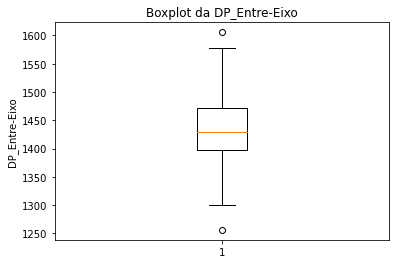

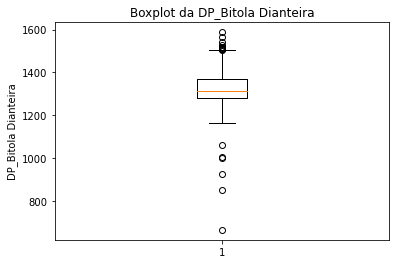

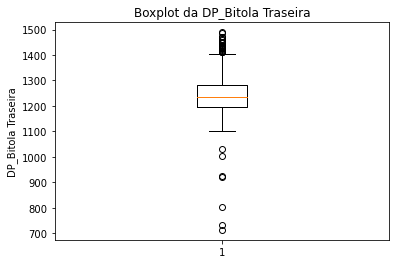

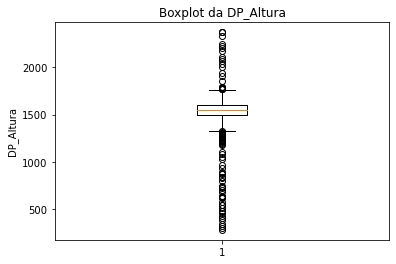

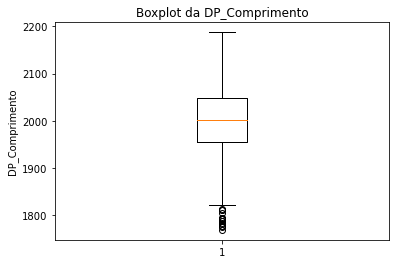

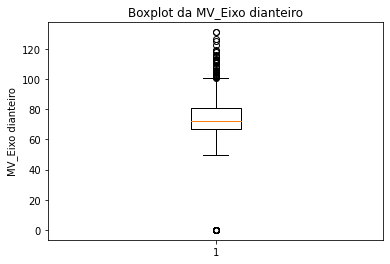

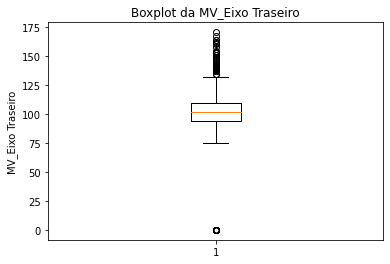

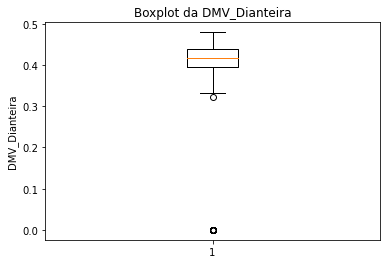

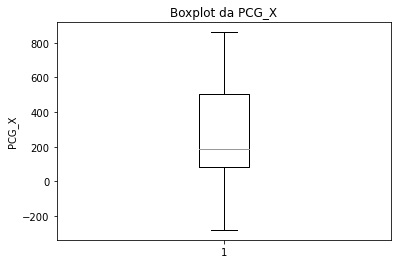

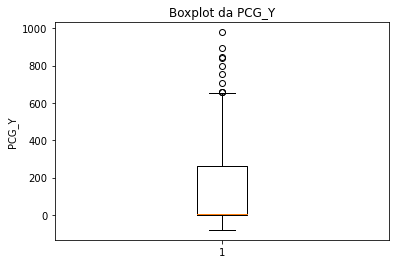

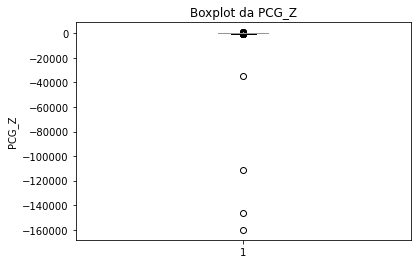

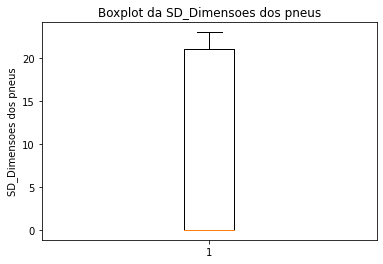

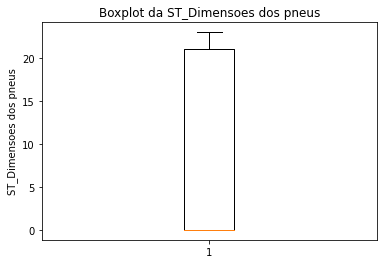

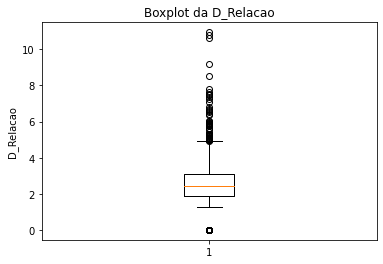

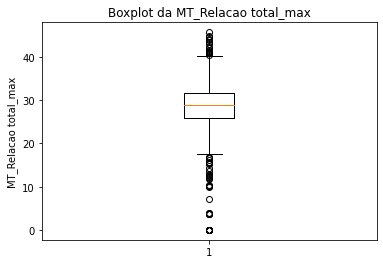

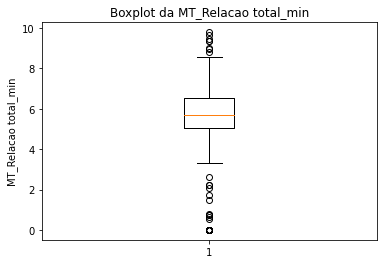

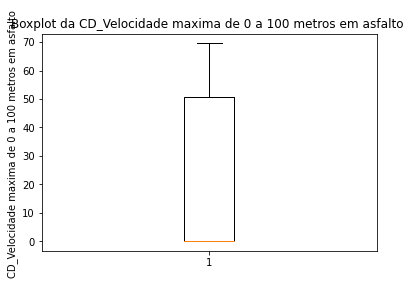

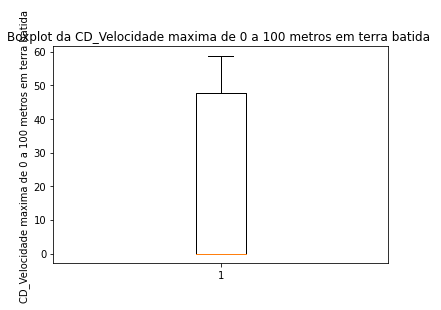

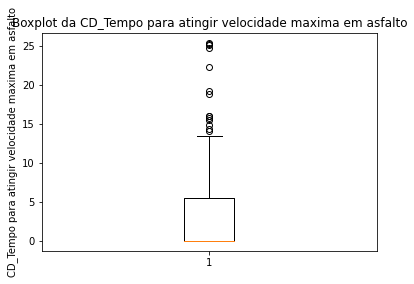

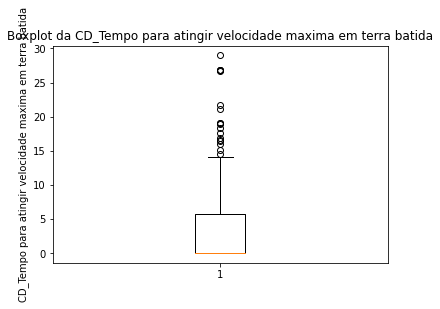

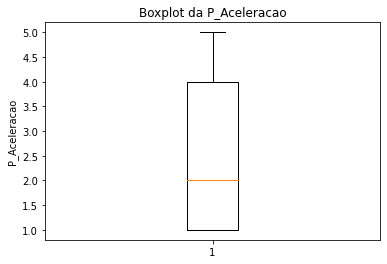

In [63]:
# Boxplot
for coluna in df.columns:          # Loop para gerar boxplots para cada variável
    plt.boxplot(df[coluna])
    plt.title(f'Boxplot da {coluna}')
    plt.ylabel(coluna)
    plt.show()

In [51]:
iqr_limit = 1.5

def remove_outliers(df, iqr_limit=1.5):
    outliers_removed = df.copy()
    for coluna in df.columns:
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_limit * IQR
        upper_bound = Q3 + iqr_limit * IQR
        outliers_removed = outliers_removed[(outliers_removed[coluna] >= lower_bound) & (outliers_removed[coluna] <= upper_bound)]
    return outliers_removed

data_sem_outliers = remove_outliers(df, iqr_limit)

In [57]:
data_corr = df.drop(['P_Aceleracao'], axis=1)
# Análise de correlação dos parâmetros
correlation = df.corr()

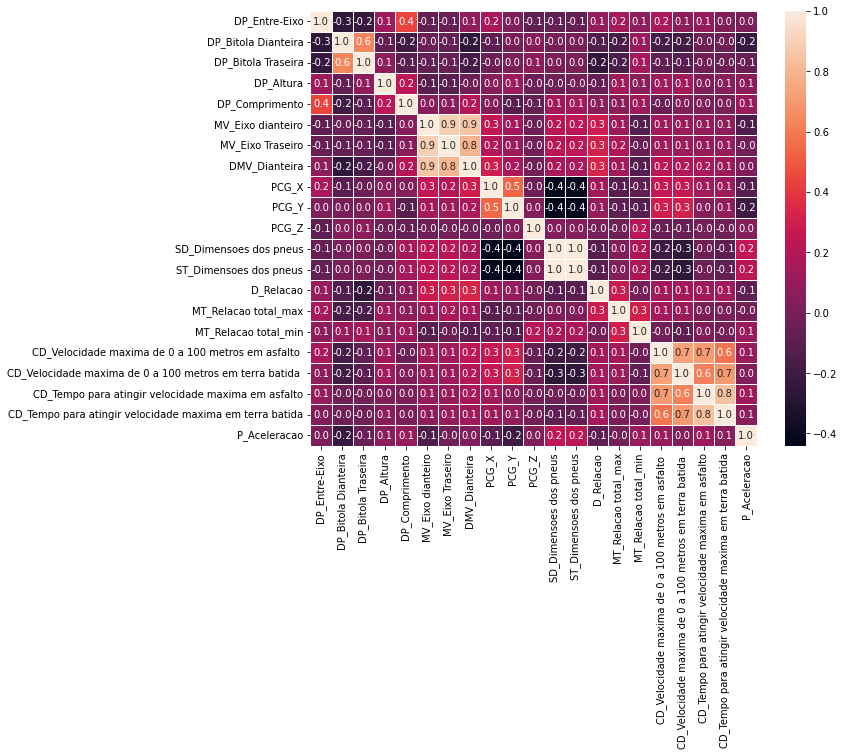

In [58]:
# Plot da matriz de correlação
plt.figure(figsize=(10, 8))

plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=0.5)
plt.show()

In [75]:
# Selecionar as duas variáveis a serem reduzidas (Variavel1 e Variavel2)
variaveis_reduzidas = df[['SD_Dimensoes dos pneus', 'ST_Dimensoes dos pneus']]

# Aplicar PCA para reduzir as duas variáveis em uma única variável
pca = PCA(n_components=1)
variavel_reduzida = pca.fit_transform(variaveis_reduzidas)

# Adicione a variável reduzida de volta ao DataFrame original
#df['Dimensoes dos pneus'] = variavel_reduzida

,DP_Entre-Eixo,DP_Bitola Dianteira,DP_Bitola Traseira,DP_Altura,DP_Comprimento,MV_Eixo dianteiro,MV_Eixo Traseiro,DMV_Dianteira,PCG_X,PCG_Y,...,SD_Dimensoes dos pneus,ST_Dimensoes dos pneus,D_Relacao,MT_Relacao total_max,MT_Relacao total_min,CD_Velocidade maxima de 0 a 100 metros em asfalto,CD_Velocidade maxima de 0 a 100 metros em terra batida,CD_Tempo para atingir velocidade maxima em asfalto,CD_Tempo para atingir velocidade maxima em terra batida,P_Aceleracao
0,1409.565056,1291.374765,1127.937101,1663.806440,2056.763003,77.103974,95.577887,0.454945,208.702782,-22.463140,...,21.0,22.0,2.363351,27.844530,5.094629,0.000000,0.000000,0.000000,0.000000,1
1,1507.926208,1309.115732,1242.659913,1530.587966,2098.250774,71.061984,91.039134,0.409187,514.604278,560.618361,...,0.0,0.0,4.954387,36.113022,5.714850,53.401821,47.982676,5.691769,10.846115,1
2,1513.425447,1301.218322,1241.176354,1669.921950,2135.010554,72.050229,93.021177,0.415841,491.093155,378.006613,...,0.0,0.0,5.934633,41.200706,5.665436,51.888566,51.800628,6.321324,4.606555,1
3,1369.669287,1262.398125,1180.965717,1368.187563,1987.070532,102.342058,152.610215,0.434121,85.197422,-2.070284,...,21.0,21.0,7.471144,31.048865,5.471739,0.000000,0.000000,0.000000,0.000000,1
4,1384.641327,1362.557218,1171.793778,1654.978161,1976.940021,84.700554,102.049056,0.457152,368.632469,549.636182,...,0.0,0.0,3.006571,27.621722,4.931802,46.084792,42.528714,12.293491,4.819045,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,1496.914947,1348.738646,1260.834065,1526.867980,2086.249636,65.232887,93.529321,0.404373,96.678853,0.957613,...,23.0,23.0,0.000000,29.912595,6.734184,51.095272,50.064866,10.926828,0.000000,5
995,1512.427873,1302.941470,1245.256767,1509.231194,2109.457027,72.221809,90.226812,0.441886,107.916108,6.642557,...,23.0,23.0,0.000000,30.070000,6.939000,52.114949,49.024215,8.408078,0.000000,5
996,1366.260071,1344.071570,1265.280794,1564.856065,2017.699129,70.709528,98.908065,0.401583,69.576836,2.948500,...,23.0,23.0,2.863992,27.642635,5.291697,0.000000,0.000000,0.000000,0.000000,5
997,1505.649795,1318.139122,1233.642827,1540.427717,2071.767520,60.558489,107.230112,0.352453,523.000000,-50.000000,...,22.0,23.0,3.365830,29.480000,7.370000,0.000000,0.000000,9.247290,9.848214,5


In [ ]:
# Dividir o conjunto de dados em treinamento e teste
np.random.seed(456)  # Outra semente para divisão aleatória
dados_treino, dados_teste = train_test_split(dados, test_size=0.3)

# Separar X e Y
X = dados[['Covariate1', 'Covariate2']]
Y = dados['Nota']

X_treino = dados_treino[['Covariate1', 'Covariate2']]
Y_treino = dados_treino['Nota']

X_teste = dados_teste[['Covariate1', 'Covariate2']]
Y_teste = dados_teste['Nota']

print(dados_treino)

# Escolha do Modelo

## Regressão Logística:

In [ ]:
# Modelo de regressão logística.
model_LR = LogisticRegression()
model_LR.fit(X_treino, Y_treino)

In [ ]:
# Avaliação do desempenho do modelo.
Y_pred = model_LR.predict(X_teste)

acuracia = accuracy_score(Y_teste, Y_pred)
relatorio_classificacao = classification_report(Y_teste, Y_pred)
    
print(f"Desempenho para Regressão Logística:")
print(f'Acurácia: {acuracia:.2f}')
print('Relatório de Classificação:')
print(relatorio_classificacao)

In [ ]:
# Analisar os resíduos
residuos = Y_teste - Y_pred

# Plote um gráfico de dispersão dos resíduos em relação às previsões
plt.scatter(Y_pred, residuos)
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

## Máquinas de Vetores de Suporte (SVM)

In [ ]:
# Modelo SVM com um kernel linear e "um contra todos"
model_SVM = SVC(kernel='linear', decision_function_shape='ovr')
model_SVM.fit(X_treino, Y_treino)

In [ ]:
# Avaliação do desempenho do modelo.
Y_pred = model_SVM.predict(X_teste)

acuracia = accuracy_score(Y_teste, Y_pred)
relatorio_classificacao = classification_report(Y_teste, Y_pred)
    
print(f"Desempenho para Máquinas de Vetores de Suporte:")
print(f'Acurácia: {acuracia:.2f}')
print('Relatório de Classificação:')
print(relatorio_classificacao)

In [ ]:
# Analisar os resíduos
residuos = Y_teste - Y_pred

# Plote um gráfico de dispersão dos resíduos em relação às previsões
plt.scatter(Y_pred, residuos)
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

## K-Nearest Neighbors

In [ ]:
k = 3  # Número de vizinhos (Altere por necessidade)

# Modelo de K-Vizinhos Mais Próximos (K-Nearest Neighbors - KNN).
model_KNN = KNeighborsClassifier(n_neighbors=k)
model_KNN.fit(X_treino, Y_treino)

In [ ]:
# Avaliação do desempenho do modelo usando as métricas de erro quadrático médio (RMSE) e o coeficiente de determinação (R2).
Y_pred = model_KNN.predict(X_teste)

acuracia = accuracy_score(Y_teste, Y_pred)
relatorio_classificacao = classification_report(Y_teste, Y_pred)
    
print(f"Desempenho para K-Vizinhos Mais Próximos:")
print(f'Acurácia: {acuracia:.2f}')
print('Relatório de Classificação:')
print(relatorio_classificacao)

In [ ]:
# Analisar os resíduos
residuos = Y_teste - Y_pred

# Plote um gráfico de dispersão dos resíduos em relação às previsões
plt.scatter(Y_pred, residuos)
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

## Decision Tree Classifier

In [ ]:
# Modelo de Árvore de Decisão de Classificação.
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_treino, Y_treino)

In [ ]:
# Avaliação do desempenho do modelo usando as métricas de erro quadrático médio (RMSE) e o coeficiente de determinação (R2).
Y_pred = model_DTC.predict(X_teste)

acuracia = accuracy_score(Y_teste, Y_pred)
relatorio_classificacao = classification_report(Y_teste, Y_pred)
    
print(f"Desempenho para Árvore de Decisão de Classificação:")
print(f'Acurácia: {acuracia:.2f}')
print('Relatório de Classificação:')
print(relatorio_classificacao)

In [ ]:
# Analisar os resíduos
residuos = Y_teste - Y_pred

# Plote um gráfico de dispersão dos resíduos em relação às previsões
plt.scatter(Y_pred, residuos)
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

## Random Forest Classifier

In [ ]:
# Modelo de Regressão de Floresta Aleatória.
model_RFC = RandomForestClassifier()
model_RFC.fit(X_treino, Y_treino)

In [ ]:
# Avaliação do desempenho do modelo.
Y_pred = model_RFC.predict(X_teste)

acuracia = accuracy_score(Y_teste, Y_pred)
relatorio_classificacao = classification_report(Y_teste, Y_pred)
    
print(f"Desempenho para Regressão de Floresta Aleatória:")
print(f'Acurácia: {acuracia:.2f}')
print('Relatório de Classificação:')
print(relatorio_classificacao)

In [ ]:
# Analisar os resíduos.
residuos = Y_teste - Y_pred

# Plote um gráfico de dispersão dos resíduos em relação às previsões
plt.scatter(Y_pred, residuos)
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

## XGBoost

In [ ]:
# Modelo de Extreme Gradient Boosting.
model_XGB = XGBClassifier()
model_XGB.fit(X_treinamento, y_treinamento)

In [ ]:
# Avaliação do desempenho do modelo usando as métricas de erro quadrático médio (RMSE) e o coeficiente de determinação (R2).
Y_pred = model_XGB.predict(X_teste)

acuracia = accuracy_score(Y_teste, Y_pred)
relatorio_classificacao = classification_report(Y_teste, Y_pred)
    
print(f"Desempenho para Extreme Gradient Boosting:")
print(f'Acurácia: {acuracia:.2f}')
print('Relatório de Classificação:')
print(relatorio_classificacao)

In [ ]:
# Analisar os resíduos
residuos = Y_teste - Y_pred

# Plote um gráfico de dispersão dos resíduos em relação às previsões
plt.scatter(Y_pred, residuos)
plt.xlabel('Previsões')
plt.ylabel('Resíduos')
plt.show()

# Treinamento do Modelo

## Bootstraps

In [ ]:
n_iterations = 100  # Número de iterações do Bootstrap

# Lista para armazenar as métricas de desempenho em cada iteração
performance_metrics = []

for _ in range(n_iterations):
    # Amostragem Bootstrap: crie um conjunto de treinamento com reamostragem
    indices_amostra = np.random.choice(len(X_treino), size=len(X_treino), replace=True)
    X_bootstrap = X_treino[indices_amostra]
    y_bootstrap = Y_treino[indices_amostra]

    # Crie e treine seu modelo
    model_XGB.fit(X_bootstrap, y_bootstrap)

    # Avalie o modelo no conjunto de teste
    desempenho = model_XGB.score(X_teste, Y_teste)  # Use a métrica apropriada para o seu problema
    performance_metrics.append(desempenho)

In [ ]:
# Calcule as métricas resumidas (por exemplo, média e desvio padrão)
media_desempenho = np.mean(performance_metrics)
desvio_padrao_desempenho = np.std(performance_metrics)

# Imprima as métricas resumidas
print(f'Média do desempenho: {media_desempenho:.4f}')
print(f'Desvio Padrão do desempenho: {desvio_padrao_desempenho:.4f}')

# Avaliação do Modelo

## Cross-Validation

In [ ]:
# Número de classes
n_classes = 5

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
#kfold = StratifiedKFold(n_splits = 5, shuffle = True) # Caso uma classe prevaleça muita em função da outra

In [ ]:
# Calcule a média das pontuações para avaliação de Acurácia do modelo
def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean * 100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'.format((mean - 2 * dv) * 100, (mean + 2 * dv) * 100)

scores = cross_val_score(model_XGB, X_treino, Y_treino, cv=kfold, scoring='accuracy') # Checar Modelo
intervalo(scores)

In [ ]:
# Calcule a média das pontuações para avaliação de Precisão do modelo
def intervalo_prec(results):
    mean = results.mean()
    dv = results.std()
    print('Precisão média: {:.2f}%'.format(mean * 100))
    print('Intervalo de Precisão: [{:.2f}% ~ {:.2f}%]'.format((mean - 2 * dv) * 100, (mean + 2 * dv) * 100)

scores = cross_val_score(model_XGB, X_treino, Y_treino, cv=kfold, scoring='precision_macro') # Checar Modelo
intervalo_prec(scores)

In [ ]:
# Calcule a média das pontuações para avaliação de Recall do modelo
def intervalo_recall(results):
    mean = results.mean()
    dv = results.std()
    print('Recall médio: {:.2f}%'.format(mean * 100))
    print('Intervalo de Recall: [{:.2f}% ~ {:.2f}%]'.format((mean - 2 * dv) * 100, (mean + 2 * dv) * 100)

scores = cross_val_score(model_XGB, X_treino, Y_treino, cv=kfold, scoring='recall_macro') # Checar Modelo
intervalo_recall(scores)

In [ ]:
# Comparar scores de Previsão e Recall
y_scores = cross_val_predict(model_XGB, X_treino, Y_treino, cv=kfold, method='predict_proba')

precisions, recalls, thresholds = precision_recall_curve(Y_treino, y_scores, pos_label=1) # Certifique-se de especificar a classe positiva correta

fig, ax = plt.subplots(figsize=(12, 3))
plt.plot(thresholds, precisions, 'b--', label='Precisão')
plt.plot(thresholds, recalls, 'g-', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='center right')
plt.ylim([0, 1])
plt.title('Precisão x Recall', fontsize=14)
plt.show()

In [ ]:
# Matriz de Confusão
Y_pred = cross_val_predict(model_XGB, X_treino, Y_treino, cv=kfold) # Checar Modelo

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(Y_treino, Y_pred), annot=True, ax=ax, fmt='d', cmap='Reds', cbar=False, square=True)
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

In [ ]:
# Relatório do modelo
print('Relatório de classificação:\n', classification_report(Y_treino, Y_pred, digits=4))

In [ ]:
# Receiver operating characteristic — ROC
fpr, tpr, thresholds = roc_curve(Y_treino, y_scores[:, 1]) # Certifique-se de especificar a classe positiva correta

fig, ax = plt.subplots(figsize=(12, 4))
plt.plot(fpr, tpr, linewidth=2, label='Logistic Regression') # Checar Modelo
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc='lower right')
plt.title('Curva ROC', fontsize=14)
plt.show()

In [ ]:
# Área sob a Curva
print('Área sob a curva ROC: {:.4f}'.format(roc_auc_score(Y_treino, y_scores, multi_class='ovr', average='macro'))

In [ ]:
# Treinamento do modelo 
model_XGB.fit(X_treino, Y_treino) # Checar modelo

# Fazer previsões no conjunto de teste
Y_pred_teste = model_XGB.predict(X_teste)

# Acurácia no conjunto de teste
accuracy = accuracy_score(Y_teste, Y_pred_teste)
print('Acurácia no conjunto de teste: {:.2f}%'.format(accuracy * 100))

# Precisão no conjunto de teste
precision = precision_score(Y_teste, Y_pred_teste, average='macro')
print('Precisão no conjunto de teste: {:.2f}%'.format(precision * 100))

# Recall no conjunto de teste
recall = recall_score(Y_teste, Y_pred_teste, average='macro')
print('Recall no conjunto de teste: {:.2f}%'.format(recall * 100))

# Relatório de classificação no conjunto de teste
print('Relatório de classificação no conjunto de teste:\n', classification_report(Y_teste, Y_pred_teste, digits=4))

## Análise de Variáveis 

In [ ]:
# Analisar variáveis que mais afetam o modelo
importances = model_XGB.feature_importances_

# Classifique as importâncias das características
indices_ordenados = np.argsort(importances)[::-1]

print(importances)

In [ ]:
# Analisar como uma variável afeta as previsões
features_to_plot = [['Covariate1', 'Covariate2']]

# Crie PDPs para as variáveis escolhidas
plot_partial_dependence(model_XGB, X_treino, features=features_to_plot)
plt.show()

In [ ]:
# Crie um objeto explainer
explainer = shap.Explainer(model_XGB, X_treino)

# Calcule os valores Shapley para um exemplo de dado específico
shap_values = explainer.shap_values(X_teste)

# Visualize os valores Shapley
shap.summary_plot(shap_values, X_teste)

# Aprimoramento de Parâmetros

## Tuning

In [ ]:
# Exemplo de Tuning
param_grid = {
    'n_estimators': [10, 20, 30],           # Número de árvores na floresta
    'max_depth': [None, 10, 20, 30],        # Profundidade máxima das árvores
    'min_samples_split': [2, 5, 10],        # Número mínimo de amostras necessárias para dividir um nó
    'min_samples_leaf': [1, 2, 4],          # Número mínimo de amostras em uma folha
    'max_features': ['auto', 'sqrt']        # Número máximo de recursos a serem considerados em cada divisão
}

grid_search = GridSearchCV(estimator=model_XGB, param_grid=param_grid, cv=5)

grid_search.fit(X_treino, Y_treino)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [ ]:
# Ajustar um modelo de RandomForestRegressor
model_XGB.fit(X_treino, Y_treino)

# Configure o modelo com os melhores parâmetros
model_XGB.set_params(**best_params)

In [ ]:
# Avaliação do desempenho do modelo usando as métricas de erro quadrático médio (RMSE) e o coeficiente de determinação (R2).
Y_pred = model_XGB.predict(X_teste)

acuracia = accuracy_score(Y_teste, Y_pred)
relatorio_classificacao = classification_report(Y_teste, Y_pred)
    
print(f"Desempenho para Extreme Gradient Boosting:")
print(f'Acurácia: {acuracia:.2f}')
print('Relatório de Classificação:')
print(relatorio_classificacao)

## Redução de Dimensão

In [ ]:
# Selecione um número específico de características mais importantes
num_caracteristicas_selecionadas = 3  # Por exemplo, selecione as 3 mais importantes

X_treino_selecionado = X_treino[:, indices_ordenados[:num_caracteristicas_selecionadas]]
X_teste_selecionado = X_teste[:, indices_ordenados[:num_caracteristicas_selecionadas]]

# Em seguida, treine seu modelo no conjunto de dados com características selecionadas
model_XGB.fit(X_treino_selecionado, Y_treino)

In [ ]:
# Avaliação do desempenho do modelo usando as métricas de erro quadrático médio (RMSE) e o coeficiente de determinação (R2).
Y_pred = model_XGB.predict(X_teste)

acuracia = accuracy_score(Y_teste, Y_pred)
relatorio_classificacao = classification_report(Y_teste, Y_pred)
    
print(f"Desempenho para Extreme Gradient Boosting:")
print(f'Acurácia: {acuracia:.2f}')
print('Relatório de Classificação:')
print(relatorio_classificacao)

# Predição

In [ ]:
# Valor único para fazer a previsão
X_prev = np.array([6]).reshape(-1, 1) # Colocar os valores pedidos

# Faça a previsão
previsao = modelo_carregado.predict(X_prev)

# Imprima a previsão
print(f'A previsão para X_prev é: {previsao[0]:.2f}')